In [1027]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Start with data preprocessing

In [1028]:
df = pd.read_csv('data.csv')
print(df.head())

   AGE  FEMALE  LOS  RACE  TOTCHG  APRDRG
0   17       1    2   1.0    2660     560
1   17       0    2   1.0    1689     753
2   17       1    7   1.0   20060     930
3   17       1    1   1.0     736     758
4   17       1    1   1.0    1194     754


In [1030]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


One place in Race is missing, since it has to be unique value out of the possible values. We replace the missing Race with the most common Race

In [1031]:
df["RACE"] = df["RACE"].fillna(df["RACE"].mode().iloc[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    500 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [1032]:
df = df.sort_values(by="TOTCHG",ascending=True).reset_index(drop=True)
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,16,1,1,1.0,532,753
1,16,1,1,1.0,532,755
2,16,1,1,1.0,547,754
3,13,1,1,1.0,548,751
4,0,0,1,1.0,550,640


#### Ok now let's figure out the number of people of different Ages

In [1033]:
for col in df.columns:
    col_count = df[col].value_counts().sort_index()
    print(col_count)

AGE
0     307
1      10
2       1
3       3
4       2
5       2
6       2
7       3
8       2
9       2
10      4
11      8
12     15
13     18
14     25
15     29
16     29
17     38
Name: count, dtype: int64
FEMALE
0    244
1    256
Name: count, dtype: int64
LOS
0      15
1      79
2     224
3      98
4      38
5      14
6       8
7      11
8       1
9       1
10      1
12      2
15      1
17      1
18      2
23      1
24      1
39      1
41      1
Name: count, dtype: int64
RACE
1.0    485
2.0      6
3.0      1
4.0      3
5.0      3
6.0      2
Name: count, dtype: int64
TOTCHG
532      2
547      1
548      1
550      1
607      3
        ..
20060    1
20195    1
26356    1
29188    1
48388    1
Name: count, Length: 441, dtype: int64
APRDRG
21     1
23     1
49     1
50     1
51     1
      ..
812    3
863    1
911    1
930    2
952    1
Name: count, Length: 63, dtype: int64


Ok so we can gather that no feature has an invalid values, and since we don't have unique identifiers as a column feature, we don't need to find duplicates. But what we can do is try to find if any two features are related to each other my large margin so as to create new features.

For this we will be using a pairplot/ scatterplot matrix

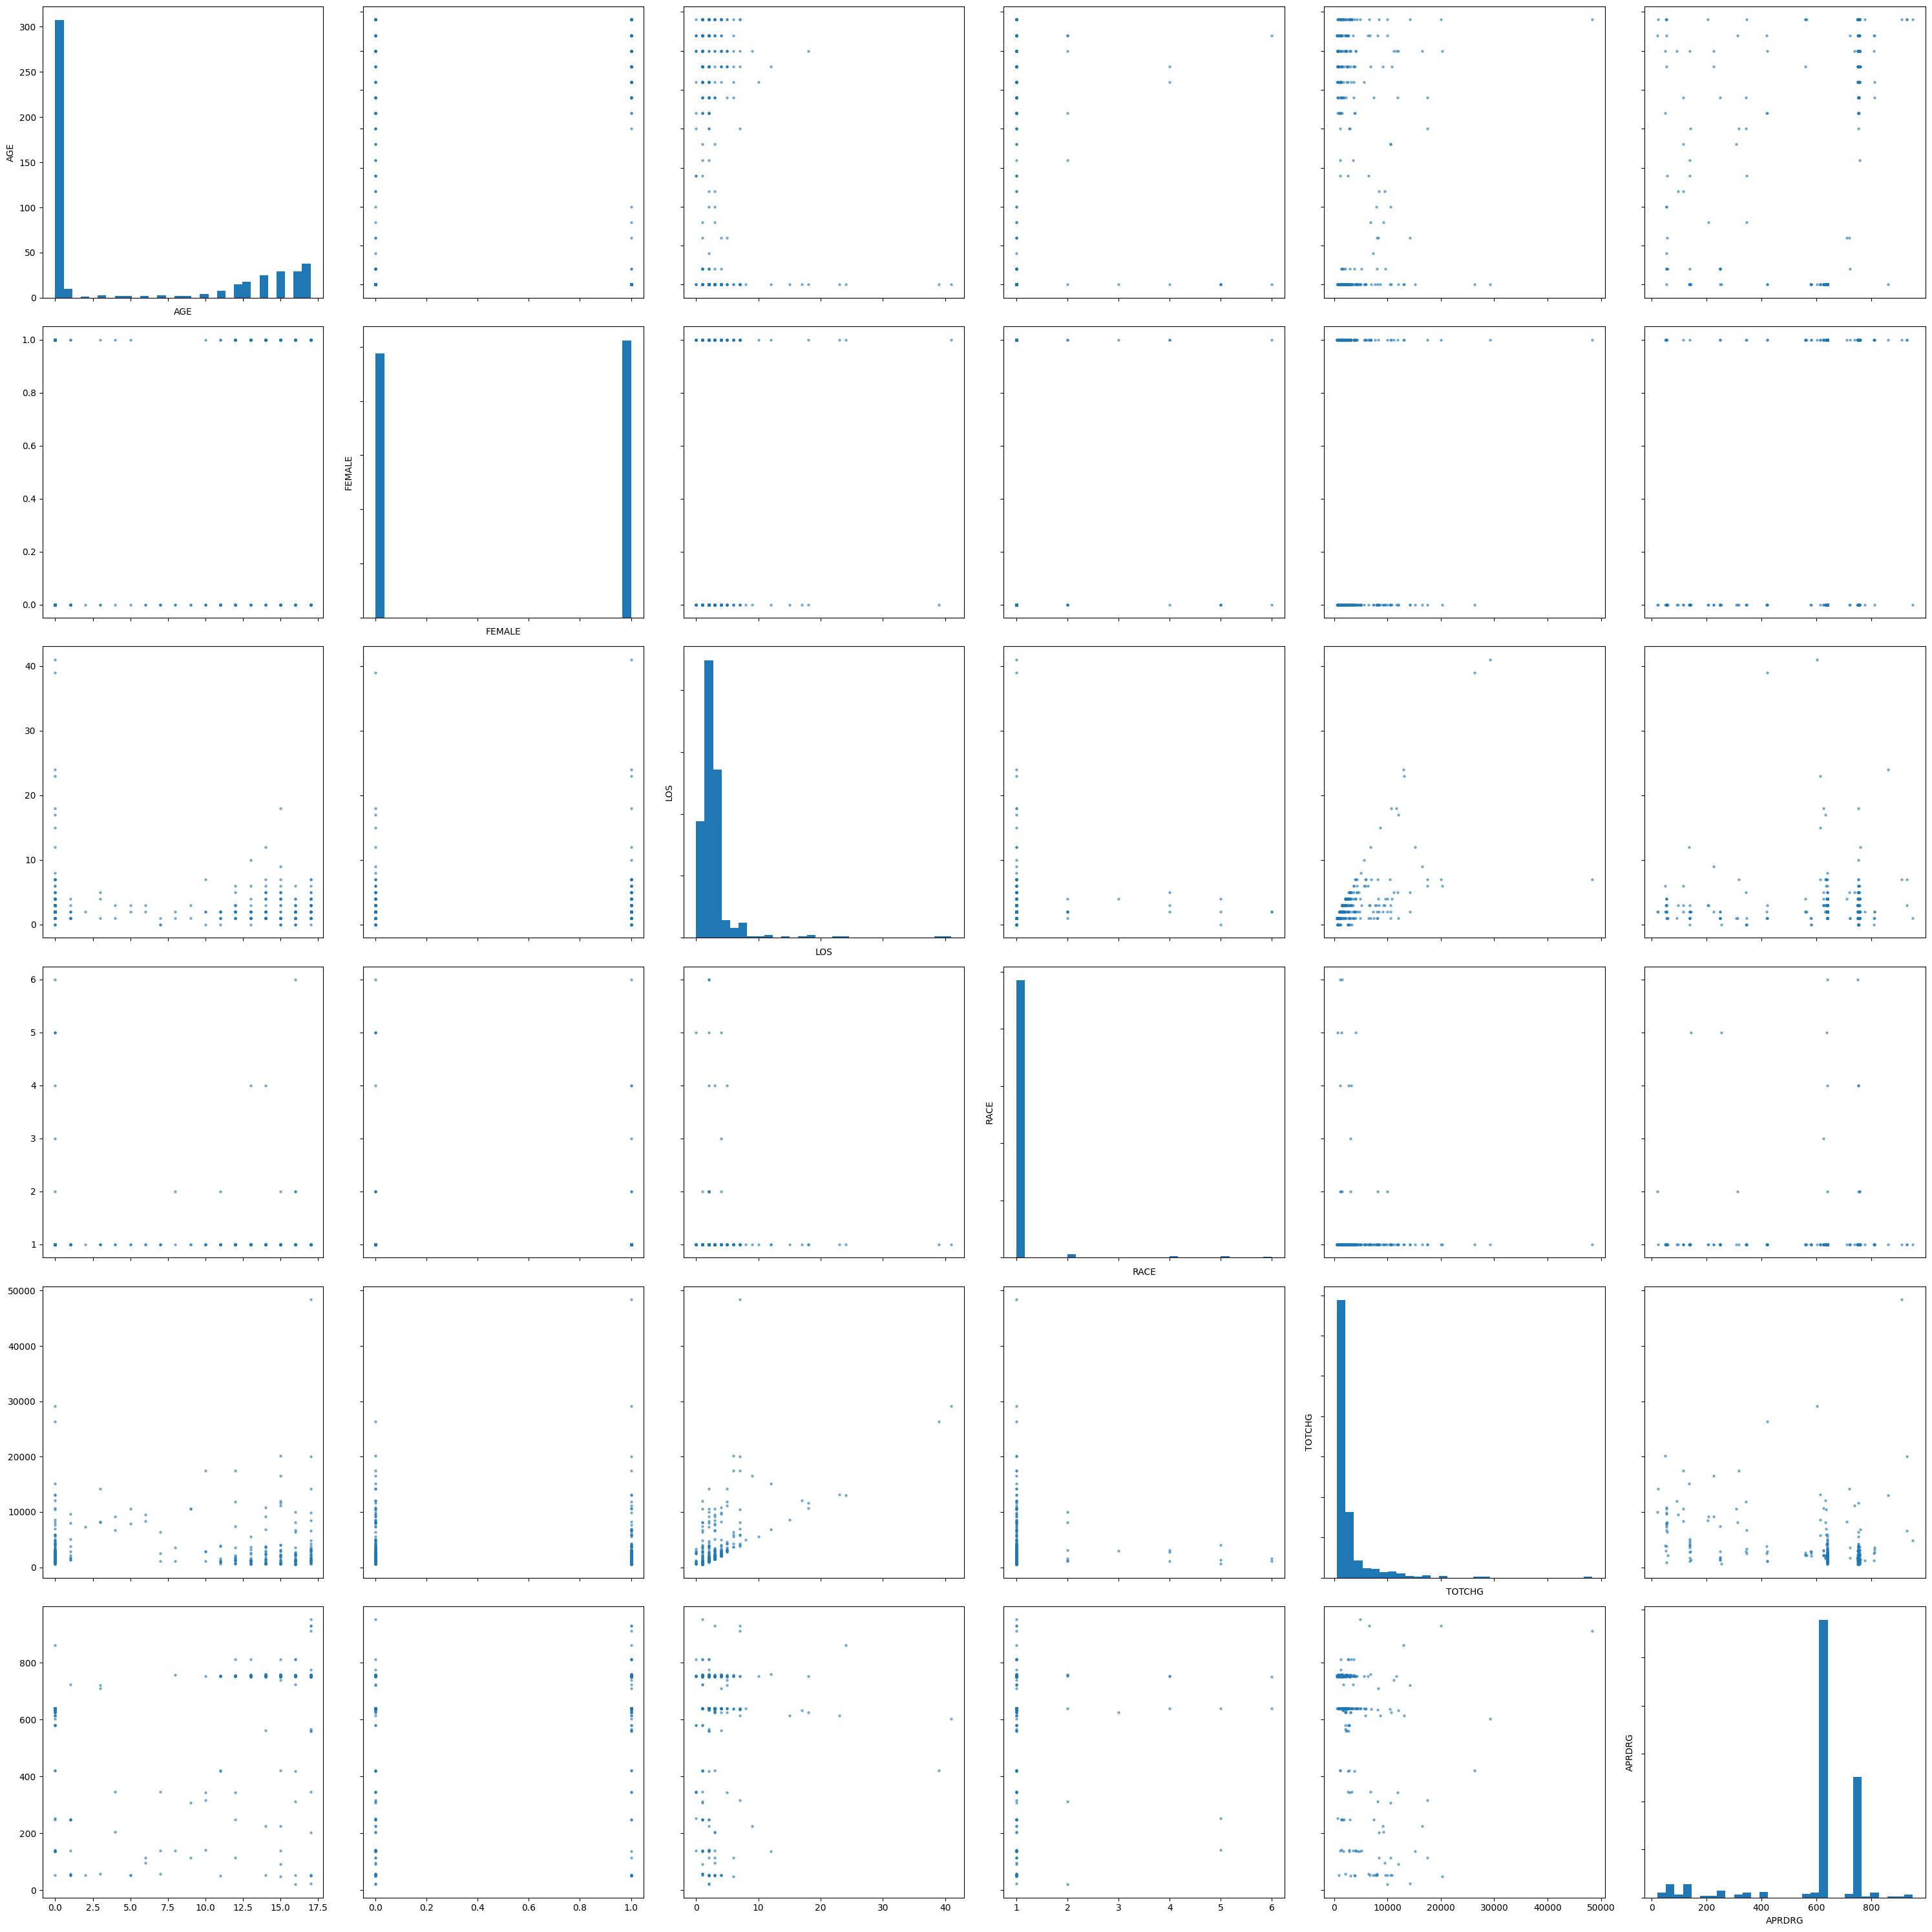

In [1034]:
features = df.columns.tolist()
n=len(features)

fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        
        if i == j:
            ax.hist(df[features[i]], bins=30)
            ax.set_ylabel(features[i])
            ax.set_xlabel(features[j])
        else:
            ax.scatter(df[features[j]], df[features[i]], s=5, alpha=0.5)


        if i != n - 1:
            ax.set_xticklabels([])
        if j != 0:
            ax.set_yticklabels([])
            
plt.tight_layout()
plt.show()

No direct correlation between any pair of features. It can be assumed that the data is cleaned as it is free from all the redundant data, all values are within range, no direct correlation between any two feature pairs (dimensionality reduction not possible).

We can move on to normalising or encoding the data for our main regression task

In [1035]:
features1 = ["AGE","LOS"]
features2 = ["RACE","APRDRG"]
features3 = ["FEMALE"]


df1  =  df.copy()
df1[features1] = df1[features1].astype(float)
df1[features1] = (df1[features1] - df1[features1].mean())/df1[features1].std()
print(df1.head(12))

         AGE  FEMALE       LOS  RACE  TOTCHG  APRDRG
0   1.570478       1 -0.543484   1.0     532     753
1   1.570478       1 -0.543484   1.0     532     755
2   1.570478       1 -0.543484   1.0     547     754
3   1.138791       1 -0.543484   1.0     548     751
4  -0.731854       0 -0.543484   1.0     550     640
5   1.426583       1 -0.840794   1.0     607     754
6   1.426583       0 -0.840794   1.0     607     754
7   1.138791       0 -0.543484   1.0     607     755
8   1.714374       1 -0.543484   1.0     610     751
9  -0.731854       0 -0.840794   5.0     615     254
10  1.714374       1 -0.543484   1.0     616     753
11  0.994895       0 -0.543484   1.0     622     755


features 2 and 3 are categorical values so we can't normalise them. Rather we can use one hot encoding for RACE as it only has 6 unique values.

In [1036]:
df1 = pd.get_dummies(df1, columns=["RACE"], drop_first=True)

race_cols = [col for col in df1.columns if col.startswith('RACE_')]
df1[race_cols] = df1[race_cols].astype(float)
print(df1.head(12))

         AGE  FEMALE       LOS  TOTCHG  APRDRG  RACE_2.0  RACE_3.0  RACE_4.0  \
0   1.570478       1 -0.543484     532     753       0.0       0.0       0.0   
1   1.570478       1 -0.543484     532     755       0.0       0.0       0.0   
2   1.570478       1 -0.543484     547     754       0.0       0.0       0.0   
3   1.138791       1 -0.543484     548     751       0.0       0.0       0.0   
4  -0.731854       0 -0.543484     550     640       0.0       0.0       0.0   
5   1.426583       1 -0.840794     607     754       0.0       0.0       0.0   
6   1.426583       0 -0.840794     607     754       0.0       0.0       0.0   
7   1.138791       0 -0.543484     607     755       0.0       0.0       0.0   
8   1.714374       1 -0.543484     610     751       0.0       0.0       0.0   
9  -0.731854       0 -0.840794     615     254       0.0       0.0       0.0   
10  1.714374       1 -0.543484     616     753       0.0       0.0       0.0   
11  0.994895       0 -0.543484     622  

For APRDRG, we can do target encoding. This methods replaces each category variable with a statistic of target variable for that specific category.

In [1037]:
aprdrg_mean = df1.groupby("APRDRG")["TOTCHG"].mean()
df1["APRDRG"] = df1["APRDRG"].map(aprdrg_mean)

df1["APRDRG"] = (df1["APRDRG"] - df1["APRDRG"].mean()) / df1["APRDRG"].std()
df1 = df1.round(5)
print(df1.head(12))

        AGE  FEMALE      LOS  TOTCHG   APRDRG  RACE_2.0  RACE_3.0  RACE_4.0  \
0   1.57048       1 -0.54348     532 -0.15459       0.0       0.0       0.0   
1   1.57048       1 -0.54348     532 -0.52415       0.0       0.0       0.0   
2   1.57048       1 -0.54348     547 -0.32175       0.0       0.0       0.0   
3   1.13879       1 -0.54348     548 -0.33573       0.0       0.0       0.0   
4  -0.73185       0 -0.54348     550 -0.31034       0.0       0.0       0.0   
5   1.42658       1 -0.84079     607 -0.32175       0.0       0.0       0.0   
6   1.42658       0 -0.84079     607 -0.32175       0.0       0.0       0.0   
7   1.13879       0 -0.54348     607 -0.52415       0.0       0.0       0.0   
8   1.71437       1 -0.54348     610 -0.33573       0.0       0.0       0.0   
9  -0.73185       0 -0.84079     615 -0.59094       0.0       0.0       0.0   
10  1.71437       1 -0.54348     616 -0.15459       0.0       0.0       0.0   
11  0.99490       0 -0.54348     622 -0.52415       

In [1038]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       500 non-null    float64
 1   FEMALE    500 non-null    int64  
 2   LOS       500 non-null    float64
 3   TOTCHG    500 non-null    int64  
 4   APRDRG    500 non-null    float64
 5   RACE_2.0  500 non-null    float64
 6   RACE_3.0  500 non-null    float64
 7   RACE_4.0  500 non-null    float64
 8   RACE_5.0  500 non-null    float64
 9   RACE_6.0  500 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 39.2 KB


In [1039]:
df1.describe()

,AGE,FEMALE,LOS,TOTCHG,APRDRG,RACE_2.0,RACE_3.0,RACE_4.0,RACE_5.0,RACE_6.0
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.000002,0.512000,0.000003,2774.388000,-0.000002,0.012000,0.002000,0.006000,0.006000,0.004000
std,0.999998,0.500357,1.000000,3888.407367,1.000000,0.108994,0.044721,0.077304,0.077304,0.063182
min,-0.731850,0.000000,-0.840790,532.000000,-0.590940,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.731850,0.000000,-0.246170,1216.250000,-0.310340,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.731850,1.000000,-0.246170,1536.500000,-0.310340,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.138790,1.000000,0.051140,2530.250000,-0.154590,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.714370,1.000000,11.348940,48388.000000,12.482660,1.000000,1.000000,1.000000,1.000000,1.000000


#### We can start with using regression by first dividing the data in the ratio 80:20 as training and testing datasets


In [1040]:
X = df1.drop(columns=["TOTCHG"])
y = df["TOTCHG"]

In [1041]:
np.random.seed(0)
indices = np.random.permutation(len(df1))
train_size = int(0.8 * len(df1))
train_idx, test_index = indices[:train_size], indices[train_size:]

df_train, df_test = df1.iloc[train_idx], df1.iloc[test_index]

X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [1042]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (400, 9)
X_test : (100, 9)
y_train: (400,)
y_test : (100,)


In [1043]:
X_train = X_train.values
y_train = y_train.values.reshape(-1, 1)

X_test = X_test.values
y_test = y_test.values.reshape(-1, 1)

In [1044]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

n = X_train.shape[1]
weights = np.zeros((n, 1))

In [1045]:

alpha = 0.0001
itr = 20000
m = X_train.shape[0]

cost_collect = []

for i in range(itr):
    y_pred = X_train.dot(weights)
    error = y_pred - y_train

    gradient = (1/m) * X_train.T.dot(error)
    weights -= alpha * gradient

    rmse = np.sqrt(np.mean(error ** 2))
    print(f"Iteration {i}, RMSE: {rmse:.2f}")
    cost_collect.append(rmse)

    ss_res = np.sum((y_train - y_pred) ** 2)
    ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    print(f"R² Score: {r2:.4f}")



    #For testing data
    y_pred_test = X_test.dot(weights)

    rmse = np.sqrt(np.mean((y_pred_test - y_test) ** 2))
    print(f"Test RMSE: {rmse:.2f}")

    ss_res = np.sum((y_test - y_pred_test) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    print(f"R² Score for Test: {r2:.4f}")

Iteration 0, RMSE: 4778.27
R² Score: -0.4804
Test RMSE: 4753.90
R² Score for Test: -0.6495
Iteration 1, RMSE: 4777.72
R² Score: -0.4800
Test RMSE: 4753.23
R² Score for Test: -0.6490
Iteration 2, RMSE: 4777.18
R² Score: -0.4797
Test RMSE: 4752.56
R² Score for Test: -0.6486
Iteration 3, RMSE: 4776.63
R² Score: -0.4794
Test RMSE: 4751.89
R² Score for Test: -0.6481
Iteration 4, RMSE: 4776.08
R² Score: -0.4790
Test RMSE: 4751.22
R² Score for Test: -0.6477
Iteration 5, RMSE: 4775.53
R² Score: -0.4787
Test RMSE: 4750.55
R² Score for Test: -0.6472
Iteration 6, RMSE: 4774.99
R² Score: -0.4784
Test RMSE: 4749.88
R² Score for Test: -0.6467
Iteration 7, RMSE: 4774.44
R² Score: -0.4780
Test RMSE: 4749.21
R² Score for Test: -0.6463
Iteration 8, RMSE: 4773.89
R² Score: -0.4777
Test RMSE: 4748.54
R² Score for Test: -0.6458
Iteration 9, RMSE: 4773.35
R² Score: -0.4773
Test RMSE: 4747.87
R² Score for Test: -0.6453
Iteration 10, RMSE: 4772.80
R² Score: -0.4770
Test RMSE: 4747.20
R² Score for Test: -0.644

#### Thus we have the optimum result of Rsquare test giving 0.8705 for testing data and 0.8890 for training data

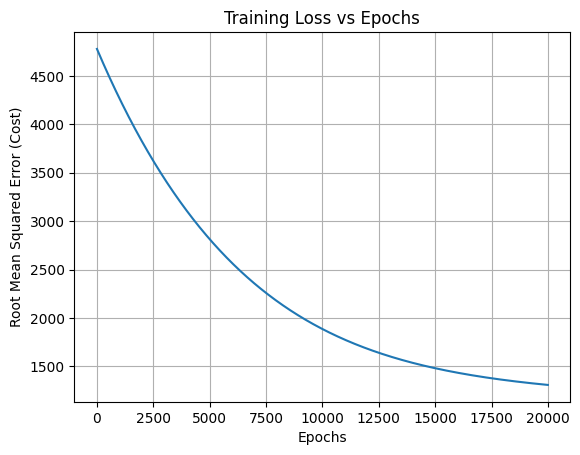

In [1046]:
plt.plot(range(len(cost_collect)), cost_collect)
plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error (Cost)")
plt.title("Training Loss vs Epochs")
plt.grid(True)
plt.show()